In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Anaylsis of the OGCI data set

Simple analysis to work out the sources of estimates of CCS for the USA.

In [2]:
df_ogci = pd.read_excel('CRSC_CYCLE_4_FINAL_2024_160724.xlsx')
df_usa = df_ogci[df_ogci['country'] == 'United States of America'].copy()

In [3]:
print(df_usa.columns.tolist())

['code', 'region', 'country', 'area', 'latitude', 'longitude', 'site_name', 'basin', 'formation', 'unit_designation', 'type', 'storage_unit_type', 'discovery_status', 'age', 'publication', 'project_history', 'development_plan', 'containment_summary', 'assessment_notes', 'simulation_model', 'year_of_publication', 'date_of_assessment', 'author', 'site_area_km2', 'depth', 'thickness_m', 'ntg', 'porosity', 'permeability_md', 'brine_salinity', 'co2_density', 'well_count', 'well_density', 'single_well_discovery_area', 'pressure_psig', 'source_of_storage_efficiency_factor', 'storage_efficiency', 'pore_compressibility', 'frac_pressure', 'pre_injection_pressure', 'source_of_analogue', 'assessment', 'stored_low', 'stored_mid', 'stored_high', 'on_injection_low', 'on_injection_mid', 'on_injection_high', 'approved_for_development_low', 'approved_for_development_mid', 'approved_for_development_high', 'justified_for_development_low', 'justified_for_development_mid', 'justified_for_development_high', 

In [4]:
set(df_usa['discovery_status'].to_list())

{'Discovered', 'Partly Discovered', 'Undiscovered'}

In [5]:
df_usa.groupby(by=['discovery_status']).sum()['total_mid']

discovery_status
Discovered            257956.986
Partly Discovered         30.000
Undiscovered         7803827.000
Name: total_mid, dtype: float64

### Where do the totals come from?

In [6]:
df_usa.groupby(by=['discovery_status']).sum()['inaccessible_subcommercial_mid']

discovery_status
Discovered           202691.14
Partly Discovered         0.00
Undiscovered              0.00
Name: inaccessible_subcommercial_mid, dtype: float64

In [7]:
df_usa.groupby(by=['discovery_status']).sum()['sequence_play_mid']

discovery_status
Discovered                0.0
Partly Discovered         0.0
Undiscovered         415579.0
Name: sequence_play_mid, dtype: float64

In [8]:
df_usa.groupby(by=['discovery_status']).sum()['basin_play_mid']

discovery_status
Discovered                 0.0
Partly Discovered          0.0
Undiscovered         7388247.0
Name: basin_play_mid, dtype: float64

<Axes: xlabel='discovery_status'>

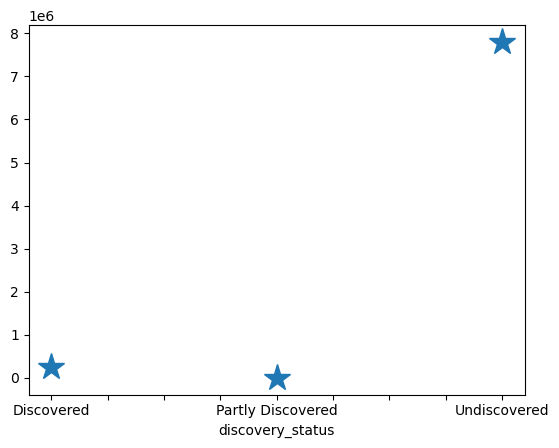

In [9]:
df_usa.groupby(by=['discovery_status']).sum()['total_mid'].plot(marker='*', linewidth=0, markersize=20)

In [10]:
storage_estimates = ['stored_low', 'stored_mid', 'stored_high', 'on_injection_low', 'on_injection_mid', 'on_injection_high', 'approved_for_development_low', 'approved_for_development_mid', 'approved_for_development_high', 'justified_for_development_low', 'justified_for_development_mid', 'justified_for_development_high', 'development_pending_low', 'development_pending_mid', 'development_pending_high', 'development_on_hold_low', 'development_on_hold_mid', 'development_on_hold_high', 'development_not_viable_low', 'development_not_viable_mid', 'development_not_viable_high', 'development_unclarified_low', 'development_unclarified_mid', 'development_unclarified_high', 'inaccessible_subcommercial_low', 'inaccessible_subcommercial_mid', 'inaccessible_subcommercial_high', 'prospect_low', 'prospect_mid', 'prospect_high', 'lead_low', 'lead_mid', 'lead_high', 'sequence_play_low', 'sequence_play_mid', 'sequence_play_high', 'basin_play_low', 'basin_play_mid', 'basin_play_high', 'undiscovered_inaccessible_low', 'undiscovered_inaccessible_mid', 'undiscovered_inaccessible_high']

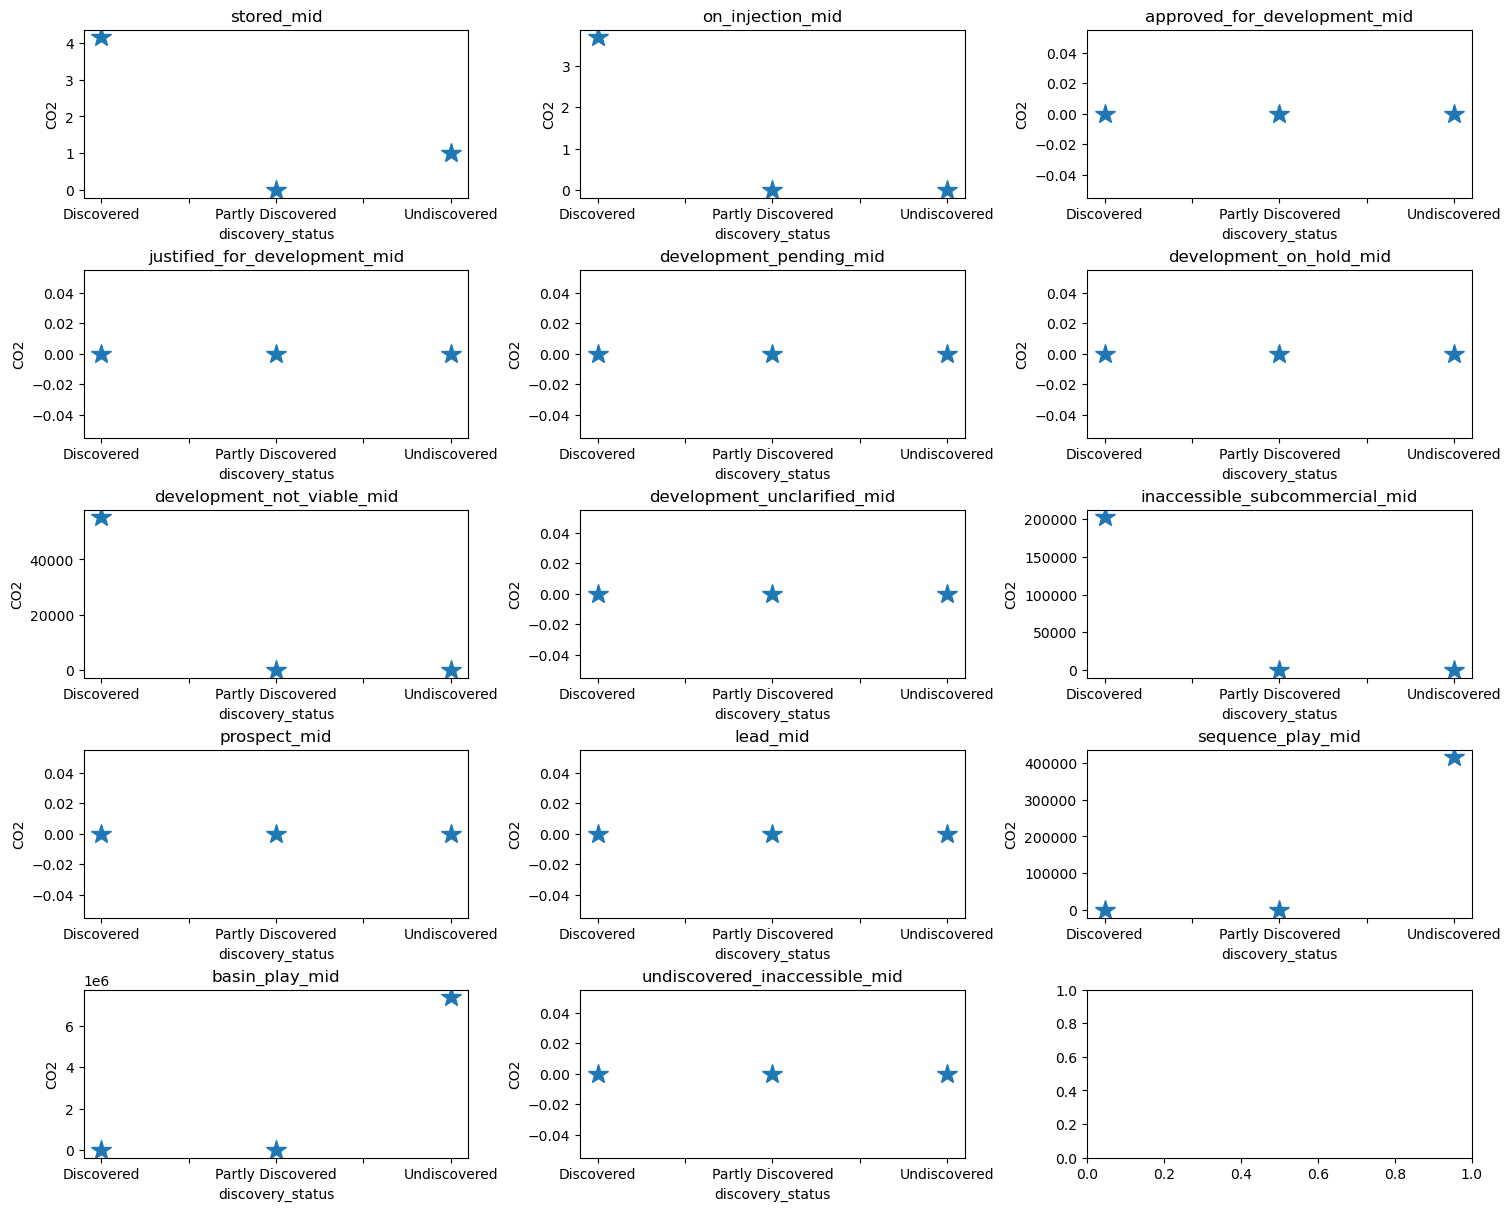

In [11]:
fig, axs = plt.subplots(5, 3, figsize=[15, 12], layout='constrained')

i = 0
j = 0
k = 0
for storage_estimate in storage_estimates:
    if 'mid' in storage_estimate:
        df_usa.groupby(by=['discovery_status']).sum()[storage_estimate].plot(marker='*', linewidth=0, markersize=15, ax=axs[i, j])
        axs[i, j].set_title(storage_estimate)
        axs[i, j].set_ylabel('CO2')
        k = k + 1
        i = int(k / 3)
        j = k - i * 3
    

### Most entries are zero

Plot only the non-zero entries on storage estimate

In [12]:
non_zero_storage_label = []

for storage_estimate in storage_estimates:
    if 'mid' in storage_estimate:
        if df_usa.groupby(by=['discovery_status']).sum()[storage_estimate].sum() > 0:
           non_zero_storage_label.append(storage_estimate)

len(non_zero_storage_label)

6

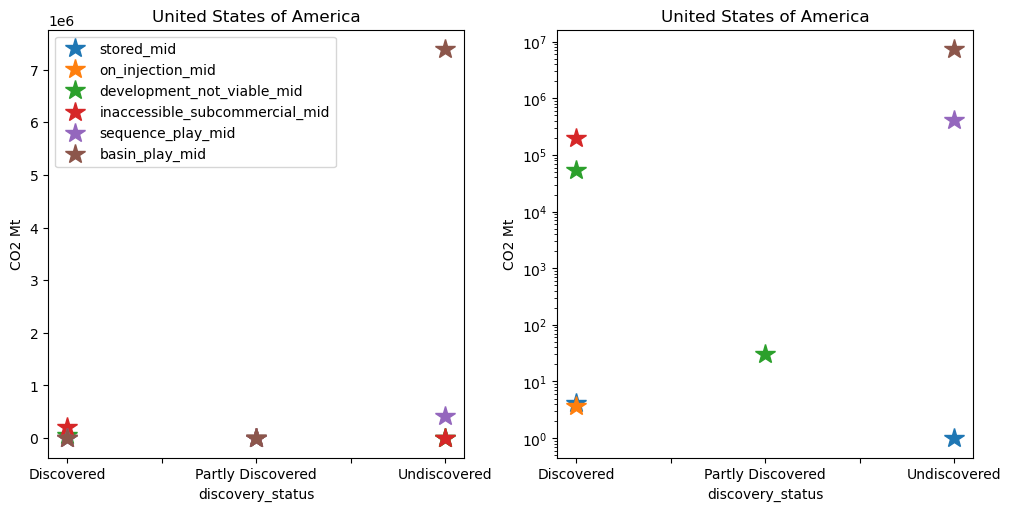

In [13]:
fig, axs = plt.subplots(1, 2, figsize=[10, 5], layout='constrained')

for storage_estimate in non_zero_storage_label:
    df_usa.groupby(by=['discovery_status']).sum()[storage_estimate].plot(marker='*', linewidth=0, markersize=15, ax=axs[0])
    df_usa.groupby(by=['discovery_status']).sum()[storage_estimate].plot(marker='*', linewidth=0, markersize=15, ax=axs[1])

axs[0].set_ylabel('CO2 Mt')
axs[0].legend(non_zero_storage_label)
axs[0].set_title('United States of America')

axs[1].set_ylabel('CO2 Mt')
axs[1].set_title('United States of America')
axs[1].set_yscale('log')

fig.savefig('initial-analysis-USA.png')

### How is the undiscovered basin play estimated? What is the source publication?

In [14]:
df_usa_discovered = df_usa[df_usa['discovery_status'] == 'Discovered']
df_usa_undiscovered = df_usa[df_usa['discovery_status'] == 'Undiscovered']

In [15]:
pub_short = []
for pub in  df_usa['publication'].to_list():
    if len(pub.split("(")) > 1:
        year = f'({pub.split("(")[1].split(")")[0]})'
    else:
        year = ''
    pub_short.append(f'{pub.split()[0]} {year}')
df_usa['pub_short'] = pub_short

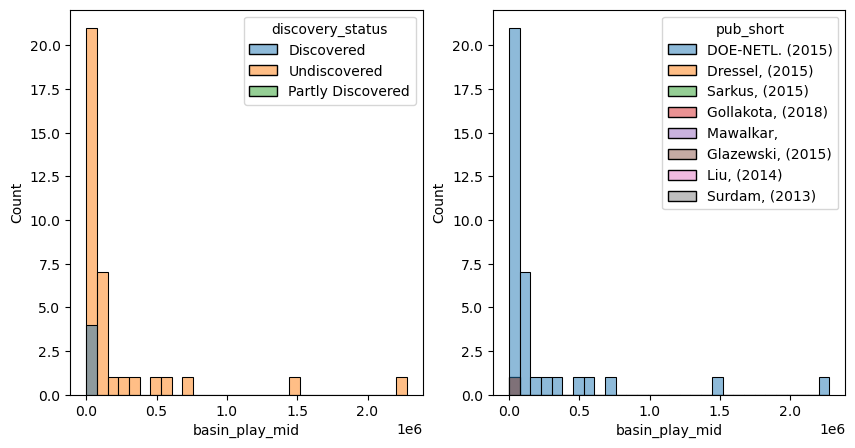

In [16]:
fig, axs = plt.subplots(1, 2, figsize=[10, 5])

sns.histplot(df_usa, x='basin_play_mid', hue='discovery_status', ax = axs[0])
sns.histplot(df_usa, x='basin_play_mid', hue='pub_short', ax = axs[1])

fig.savefig('usa-sources.png')

In [17]:
df_usa[df_usa['basin_play_mid'] > 1e6]['basin_play_mid'].sum()

np.float64(3783030.0)

In [18]:
df_usa[df_usa['basin_play_mid'] > 1e6]['publication']

684    DOE-NETL. (2015). Carbon Storage Atlas V. US D...
686    DOE-NETL. (2015). Carbon Storage Atlas V. US D...
Name: publication, dtype: object

In [19]:
df_usa[df_usa['basin_play_mid'] > 1e6]['site_name']

684                 Texas State-wide evaluation - Saline
686    US Federal Offshore State-wide evaluation - Sa...
Name: site_name, dtype: object

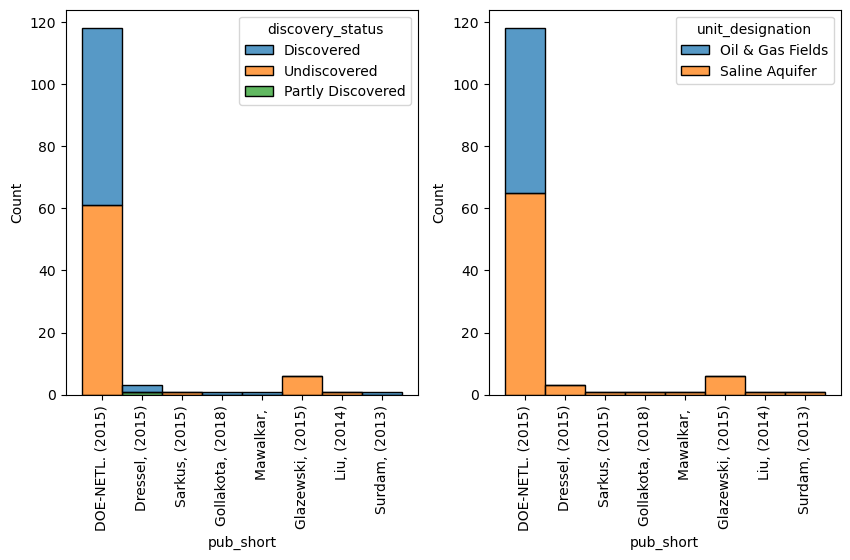

In [20]:
fig, axs = plt.subplots(1, 2, figsize=[10, 5])

sns.histplot(df_usa, x='pub_short', hue='discovery_status', multiple='stack', ax = axs[0])
sns.histplot(df_usa, x='pub_short', hue='unit_designation', multiple='stack', ax = axs[1])
axs[0].tick_params(axis='x', labelrotation=90)
axs[1].tick_params(axis='x', labelrotation=90)
    
fig.savefig('usa-pubs.png')

In [21]:
df_usa[df_usa['pub_short'] != 'DOE-NETL. (2015)'].count()

code                          14
region                        14
country                       14
area                          14
latitude                      14
                              ..
rocktype                      14
project_spec                  14
p50_pore_volume_mmcum          0
prop_considered_discovered     6
pub_short                     14
Length: 96, dtype: int64

In [22]:
df_usa[df_usa['pub_short'] == 'DOE-NETL. (2015)'].count()

code                          118
region                        118
country                       118
area                          118
latitude                      118
                             ... 
rocktype                      118
project_spec                  118
p50_pore_volume_mmcum           0
prop_considered_discovered     56
pub_short                     118
Length: 96, dtype: int64

In [23]:
df_usa[df_usa['pub_short'] == 'DOE-NETL. (2015)'].count().iloc[0] / len(df_usa)

np.float64(0.8939393939393939)

In [24]:
df_usa[df_usa['pub_short'] == 'DOE-NETL. (2015)']['total_mid'].sum()

np.float64(7719072.214)

In [25]:
df_usa[(df_usa['pub_short'] == 'DOE-NETL. (2015)') & (df_usa['type'] == 'Saline')].count()

code                          64
region                        64
country                       64
area                          64
latitude                      64
                              ..
rocktype                      64
project_spec                  64
p50_pore_volume_mmcum          0
prop_considered_discovered     2
pub_short                     64
Length: 96, dtype: int64

In [26]:
df_usa[(df_usa['pub_short'] == 'DOE-NETL. (2015)') & (df_usa['type'] == 'Saline')]['total_mid'].sum()

np.float64(7516357.214)

In [27]:
1 - (df_usa['total_mid'].sum() - df_usa[(df_usa['pub_short'] == 'DOE-NETL. (2015)') & (df_usa['type'] == 'Saline')]['total_mid'].sum()) / df_usa['total_mid'].sum() 

np.float64(0.9323406899554827)

### DOE Report accounts for 89% of play entries

The [DOE report on CCS capacity](https://www.netl.doe.gov/sites/default/files/2018-10/ATLAS-V-2015.pdf) for the US accounts for 7719 Gt of the CO2 estimate and of this 118 basins, 64 are saline aquifers, and these account for 7515 Gt of the total estimate using the "mid" estimate. That is 93% of the estimate for the USA.

How is this calculated:

$$ G_{CO2} = A h f_{tot} \rho E $$

Where $G_{CO2}$ is the storage volume of CO2, $A$ is the area of the play, $h$ is the gross formation thickness of the play, $f_{tot}$ is the total porosity, $\rho$ is the density of CO2 in the water and $E=0.02$ is the efficiency term for the "mid" estimate.

In [28]:
df_DOE_saline = df_usa[(df_usa['pub_short'] == 'DOE-NETL. (2015)') & (df_usa['type'] == 'Saline')].copy()
CO2_density = df_DOE_saline['co2_density'].to_numpy()
is_a_number = ~np.isnan(CO2_density)
print(CO2_density[is_a_number])

[0.]


No CO2 density recorded in the data for 93% of the CCS estimate for the US. OK, I'll assume supercritical and $\rho = 700$ kg/m<sup>3</sup>, and estimate the conversion factor from volume of play to volume CO2 for the DOE saline aquifers.

In [29]:
df_DOE_saline['porosity'].describe()

count      4.0
unique     4.0
top       19.5
freq       1.0
Name: porosity, dtype: float64

In [30]:
df_DOE_saline['porosity']

576     NaN
577     NaN
578    19.5
580     NaN
582     NaN
       ... 
696     NaN
698     NaN
700     NaN
702     NaN
706       0
Name: porosity, Length: 64, dtype: object

In [31]:
df_DOE_saline['porosity'].mean()

np.float64(11.125)

They do not give a porosity for nearly all these formations!

In [32]:
df_DOE_saline['thickness_m'].describe()

count       6
unique      6
top       335
freq        1
Name: thickness_m, dtype: int64

There is a thickness for 6 of the saline basins. Lets see what conversion factor I can get for one that has porosity and thickness

In [33]:
conversion_factors = []
has_values = []
for i in range(len(df_DOE_saline)):
    if (df_DOE_saline['porosity'].iloc[i] > 0) and (df_DOE_saline['thickness_m'].iloc[i] > 0):
        has_values.append(True)
    else:
        has_values.append(False)
                                  

### Conversion factors

Lets back calculate them, for the three that have a thickness and porosity

`total_mid` is in Mt, which is the equivalent to 10<sup>9</sup> kg; then convert km-squared to m-squared and the conversion factor is good to go.

In [35]:
conversion_factors = 1e9 * df_DOE_saline['total_mid'][has_values] / (1e6 * df_DOE_saline['site_area_km2'][has_values] * df_DOE_saline['thickness_m'][has_values])

In [36]:
conversion_factors

578    0.052354
590         NaN
641    0.020036
dtype: object

In [37]:
df_DOE_saline['site_name'][has_values]

578               Citronelle Project
590    RMCCS - Rocky Mountain Region
641                       Kevin Dome
Name: site_name, dtype: object

In [38]:
df_DOE_saline['unit_designation'][has_values]

578    Saline Aquifer
590    Saline Aquifer
641    Saline Aquifer
Name: unit_designation, dtype: object

## A conversion factor

Of the only two Saline Aquifers the conversion factor is either 0.052 or 0.020 from 1000 km<sup>3</sup> of reservoir to Gt CO2. The Citronelle Project (https://www.netl.doe.gov/sites/default/files/2018-11/Citronelle-SECARB-Project.PDF) and Kevin Dome (https://netl.doe.gov/coal/carbon-storage/atlas/bscsp/phase-III/kevin-dome).